In [110]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt


from src.models import SIRM, SIRT, SIRV
from src.utils.batch_sweep import sweep_two_parameters

from src.utils.visualization import *
from src.utils.visualization.core import Lx, Ly
import numpy as np

CH = ["#00441b", "#238b45", "#000", "#66c2a4", "#99d8c9"]       # used for fixed homophily
CP = ["#000", "#7f0000", "#d7301f", "#fc8d59", "#fdbb84"]       # used for fixed polarization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
NB = 100
NP = 100

homophilic_tendency = {"m": -5, "M": 5, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}
custom_base_params = {
        'beta_M': 0.3,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        # parameters for SIRM
        'mu_max': 1,
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/3,      # Set maximum testing rate to 0.5
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max':  0.025      # Set maximum VR to 0.025
    }


In [28]:
results_MASKS = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

In [4]:
results_TESTS = sweep_two_parameters(
    model_module=SIRT,
    param1_name="homophilic_tendency",     # Use testing_rate_max as the parameter to sweep
    param1_range=homophilic_tendency,     
    param2_name="beta_params",          
    param2_range=pol_range,            
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

In [5]:
results_VACCINATION = sweep_two_parameters(
    model_module=SIRV,
    param1_name="homophilic_tendency",     # Use testing_rate_max as the parameter to sweep
    param1_range=homophilic_tendency,     
    param2_name="beta_params",          
    param2_range=pol_range,            
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000
)

In [16]:
print_sweep_results(results_MASKS)
print_sweep_results(results_TESTS)
print_sweep_results(results_VACCINATION)

Model: SIRM

Parameters swept:
  polarization: 0 to 1 (100 points)
  homophilic_tendency: -5 to 5 (100 points)

Results summary:
  Total parameter combinations: 100
  R0 range: 0.8927 to 5.2564
  Homophily measure: 0.0000

Final state compartments:
  S: avg=0.6006, min=0.0396, max=0.9988
  I: avg=0.0000, min=0.0000, max=0.0005
  R: avg=0.3994, min=0.0012, max=0.9604
Model: SIRT

Parameters swept:
  homophilic_tendency: -5 to 5 (100 points)
  polarization: 0 to 1 (100 points)

Results summary:
  Total parameter combinations: 100
  R0 range: 0.8500 to 5.0757
  Homophily measure: 0.0000

Final state compartments:
  S: avg=0.5065, min=0.0945, max=0.9993
  I: avg=0.0000, min=0.0000, max=0.0000
  R: avg=0.4935, min=0.0007, max=0.9055
Model: SIRV

Parameters swept:
  homophilic_tendency: -5 to 5 (100 points)
  polarization: 0 to 1 (100 points)

Results summary:
  Total parameter combinations: 100
  R0 range: 2.2620 to 6.6048
  Homophily measure: 0.0000

Final state compartments:
  S: avg=0.03

In [ ]:
fig_overview_M = plot_multiple_metrics(results_MASKS, metrics=["infections", "I_threshold", "r0"],
                             cmaps = [my_hot_r, None , "viridis_r"], 
                             contour_values=[[0.25, 0.5, 0.75], [], [1, 2, 4, 8]],
                             contour_colors = [['black','black','black'], None, ['black', 'black', 'black']],i_threshold=1e-3)

fig_overview_T = plot_multiple_metrics(results_TESTS, metrics=["infections", "S", "I", "R", "r0"],
                             cmaps = [my_hot_r, "hot_r", "hot_r", "hot_r", "viridis_r"], 
                             contour_values=[[0.25, 0.5, 0.75], [], [], [], [1, 2, 4, 8]],
                             contour_colors = [['black','black','black'], None, None, None, ['black', 'black', 'black']],)

fig2 = plot_multiple_metrics(results_VACCINATION, metrics=["infections", "S", "I", "R", "r0"],
                             cmaps = [my_hot_r, "hot_r", "hot_r", "hot_r", "viridis_r"], 
                             contour_values=[[0.25, 0.5, 0.75], [], [], [], [2.5, 3.25, 4]],
                             contour_colors = [['black','black','black'], None, None, None, ['black', 'black', 'black']])

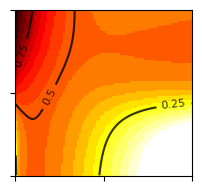

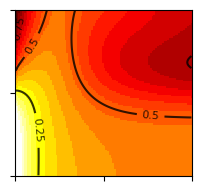

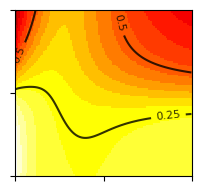

In [6]:
metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }

fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

fig_3 = plot_multiple_metrics(
    results_TESTS,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/Fig_2/I(pol,hom)_T.pdf"
)

fig_4 = plot_multiple_metrics(
    results_VACCINATION,
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params,
    save_path="./figures/Fig_2/I(pol,hom)_V.pdf"
)

In [138]:
CH = ["#00441b", "#238b45", "#000", "#66c2a4", "#99d8c9"]       # used for fixed homophily

In [116]:
CP = ["#49006a", "#ae017e", "#f768a1"]       # used for fixed polarization
import matplotlib.patches as patches

In [120]:
final_params2 = final_params.copy()

final_params2['Lx'] = Lx * 2.7
final_params2['Ly'] = Ly * 2.7

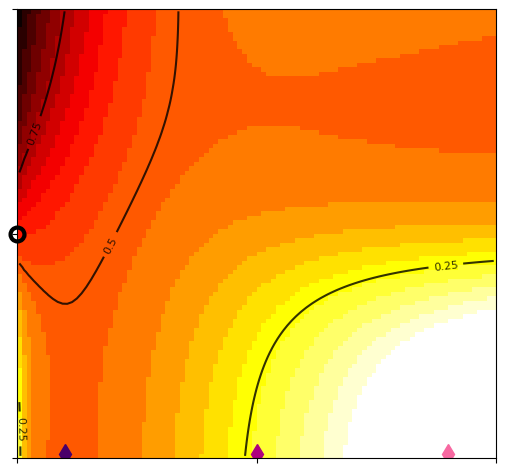

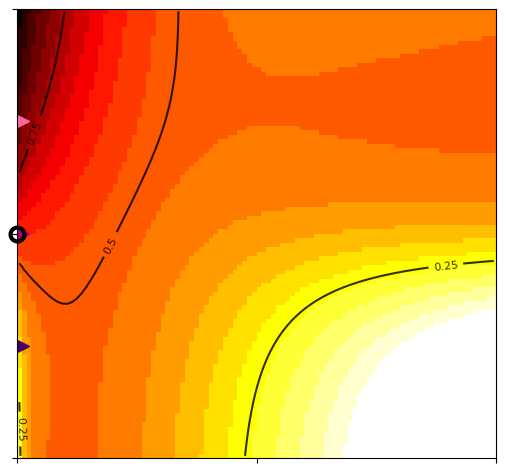

In [137]:
fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics='R',
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params2,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

ax = fig_R_M.axes

ax[0].plot(0.1, -4.9, 'd', color = CP[0], markersize=10)
ax[0].plot(0.5, -4.9, 'd', color = CP[1], markersize=10)
ax[0].plot(0.9, -4.9, 'd', color = CP[2], markersize=10)
ax[0].plot(0, 0, 'o', mfc='none', mec='black', ms=10, markeredgewidth=3, clip_on=False)


# Update the figure (might be needed in some environments)
fig_R_M.canvas.draw()


fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics='R',
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params2,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

ax = fig_R_M.axes

ax[0].plot(0.01, -2.5, '>', color = CP[0], markersize=10)
ax[0].plot(0.01, 0, '>', color = CP[1], markersize=10)
ax[0].plot(0.01, 2.5, '>', color = CP[2], markersize=10)
ax[0].plot(0, 0, 'o', mfc='none', mec='black', ms=10, markeredgewidth=3, clip_on=False)


# Update the figure (might be needed in some environments)
fig_R_M.canvas.draw()

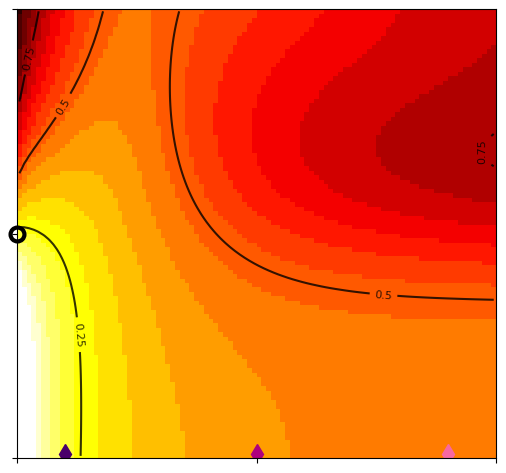

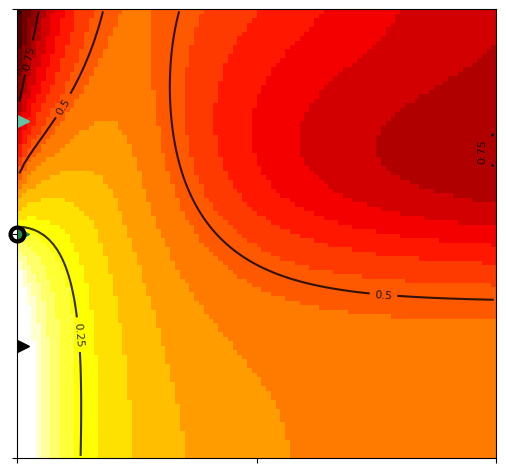

In [ ]:
fig_R_T = plot_multiple_metrics(
    results_TESTS, 
    metrics='R',
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params2,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

ax = fig_R_T.axes

ax[0].plot(0.1, -4.9, 'd', color = CP[0], markersize=10)
ax[0].plot(0.5, -4.9, 'd', color = CP[1], markersize=10)
ax[0].plot(0.9, -4.9, 'd', color = CP[2], markersize=10)
ax[0].plot(0, 0, 'o', mfc='none', mec='black', ms=10, markeredgewidth=3, clip_on=False)


# Update the figure (might be needed in some environments)
fig_R_T.canvas.draw()

fig_R_T = plot_multiple_metrics(
    results_TESTS, 
    metrics='R',
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params2,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

ax = fig_R_T.axes

ax[0].plot(0.01, -2.5, '>', color = CH[2], markersize=10)
ax[0].plot(0.01, 0, '>', color = CH[1], markersize=10)
ax[0].plot(0.01, 2.5, '>', color = CH[3], markersize=10)
ax[0].plot(0, 0, 'o', mfc='none', mec='black', ms=10, markeredgewidth=3, clip_on=False)


# Update the figure (might be needed in some environments)
fig_R_T.canvas.draw()

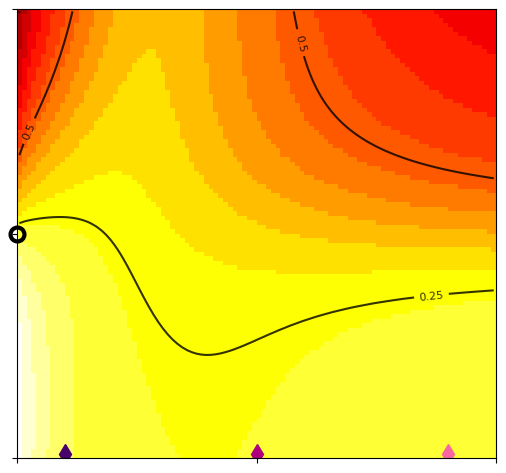

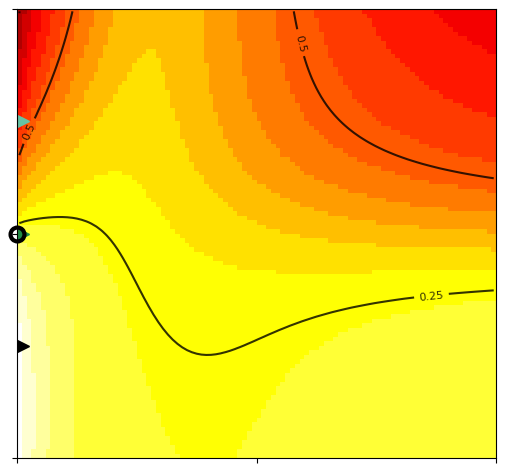

In [158]:
fig_R_V = plot_multiple_metrics(
    results_VACCINATION, 
    metrics='R',
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params2,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

ax = fig_R_V.axes

ax[0].plot(0.1, -4.9, 'd', color = CP[0], markersize=10)
ax[0].plot(0.5, -4.9, 'd', color = CP[1], markersize=10)
ax[0].plot(0.9, -4.9, 'd', color = CP[2], markersize=10)
ax[0].plot(0, 0, 'o', mfc='none', mec='black', ms=10, markeredgewidth=3, clip_on=False)


# Update the figure (might be needed in some environments)
fig_R_V.canvas.draw()

fig_R_V = plot_multiple_metrics(
    results_VACCINATION, 
    metrics='R',
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params2,
    save_path="./figures/Fig_2/I(pol,hom)_M.pdf"
)

ax = fig_R_V.axes

ax[0].plot(0.01, -2.5, '>', color = CH[2], markersize=10)
ax[0].plot(0.01, 0, '>', color = CH[1], markersize=10)
ax[0].plot(0.01, 2.5, '>', color = CH[3], markersize=10)
ax[0].plot(0, 0, 'o', mfc='none', mec='black', ms=10, markeredgewidth=3, clip_on=False)


# Update the figure (might be needed in some environments)
fig_R_V.canvas.draw()

In [153]:
def find_closest_pol_index(results, target_pol_value):
    """
    Find the index where polarization is closest to target_pol_value
    
    Args:
        results: Dictionary returned by sweep_two_parameters
        target_pol_value: The polarization value you're looking for
        
    Returns:
        Index in the flattened array where polarization is closest to target
    """
    # Get polarization values from the parameter grid
    param1_name = results['parameter_names']['param1']
    
    if param1_name == "beta_params":
        # Polarization values are in param1 (first dimension)
        pol_values = np.linspace(
            results['parameter_ranges']['param1']['m'],
            results['parameter_ranges']['param1']['M'],
            results['parameter_ranges']['param1']['n']
        )
        # Find closest index
        closest_idx = np.argmin(np.abs(pol_values - target_pol_value))
        return closest_idx
    else:
        # Polarization values are in param2 (second dimension)
        pol_values = np.linspace(
            results['parameter_ranges']['param2']['m'],
            results['parameter_ranges']['param2']['M'],
            results['parameter_ranges']['param2']['n']
        )
        # Find closest index
        closest_idx = np.argmin(np.abs(pol_values - target_pol_value))
        return closest_idx
    

def find_closest_hom_index(results, target_hom_value):
    """
    Find the index where homophilic_tendency is closest to target_hom_value
    
    Args:
        results: Dictionary returned by sweep_two_parameters
        target_hom_value: The homophilic_tendency value you're looking for
        
    Returns:
        Index in the flattened array where homophilic_tendency is closest to target
    """
    # Get parameter names to determine which one is homophilic_tendency
    param1_name = results['parameter_names']['param1']
    param2_name = results['parameter_names']['param2']
    
    if param1_name == "homophilic_tendency":
        # Homophilic tendency values are in param1 (first dimension)
        hom_values = np.linspace(
            results['parameter_ranges']['param1']['m'],
            results['parameter_ranges']['param1']['M'],
            results['parameter_ranges']['param1']['n']
        )
        # Find closest index
        closest_idx = np.argmin(np.abs(hom_values - target_hom_value))
        return closest_idx
    elif param2_name == "homophilic_tendency":
        # Homophilic tendency values are in param2 (second dimension)
        hom_values = np.linspace(
            results['parameter_ranges']['param2']['m'],
            results['parameter_ranges']['param2']['M'],
            results['parameter_ranges']['param2']['n']
        )
        # Find closest index
        closest_idx = np.argmin(np.abs(hom_values - target_hom_value))
        return closest_idx
    else:
        # Homophilic tendency not found in parameter names
        raise ValueError("homophilic_tendency not found in parameter names")

In [164]:
P = 0
I01 = find_closest_hom_index(results_MASKS, P)
P = -2.5
I05 = find_closest_hom_index(results_MASKS, P)
P = +2.5
I09 = find_closest_hom_index(results_MASKS, P)

print(I01, I05, I09)



R_M01 = np.sum(results_MASKS['final_state']['R'][I01,:], axis=1)
R_M05 = np.sum(results_MASKS['final_state']['R'][I05,:], axis=1)
R_M09 = np.sum(results_MASKS['final_state']['R'][I09,:], axis=1)


P = 0
I01 = find_closest_hom_index(results_TESTS, P)
P = -2.5
I05 = find_closest_hom_index(results_TESTS, P)
P = +2.5
I09 = find_closest_hom_index(results_TESTS, P)



R_T01 = np.sum(results_TESTS['final_state']['R'][:,I01], axis=1)
R_T05 = np.sum(results_TESTS['final_state']['R'][:,I05], axis=1)
R_T09 = np.sum(results_TESTS['final_state']['R'][:,I09], axis=1)


P = 0
I01 = find_closest_hom_index(results_VACCINATION, P)
P = -2.5
I05 = find_closest_hom_index(results_VACCINATION, P)
P = +2.5
I09 = find_closest_hom_index(results_VACCINATION, P)

R_V01 = np.sum(results_VACCINATION['final_state']['R'][:,I01], axis=1)
R_V05 = np.sum(results_VACCINATION['final_state']['R'][:,I05], axis=1)
R_V09 = np.sum(results_VACCINATION['final_state']['R'][:,I09], axis=1)


49 25 74


In [140]:
baseline_M  = sweep_two_parameters(
        model_module=SIRM,
        param1_name='beta_params',
        param1_range=[0.00001],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[0],
        custom_base_params=custom_base_params
    )

baseline_M = np.sum(baseline_M['final_state']['R'], axis=2).flatten()[0]

baseline_T  = sweep_two_parameters(
        model_module=SIRT,
        param1_name='homophilic_tendency',
        param1_range=[0],  # Varying polarization from low to high
        param2_name='beta_params',
        param2_range=[0.00001],
        custom_base_params=custom_base_params
    )

baseline_T = np.sum(baseline_T['final_state']['R'], axis=2).flatten()[0]

baseline_V  = sweep_two_parameters(
        model_module=SIRV,
        param1_name='homophilic_tendency',
        param1_range=[0],  # Varying polarization from low to high
        param2_name='beta_params',
        param2_range=[0.00001],
        custom_base_params=custom_base_params
    )

baseline_V = np.sum(baseline_V['final_state']['R'], axis=2).flatten()[0]

In [ ]:
pol_values = np.linspace(0, 1, 100)
CH = ["#00441b", "#238b45", "#000", "#66c2a4", "#99d8c9"]       # used for fixed homophily

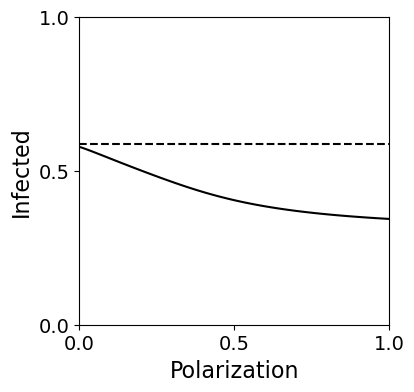

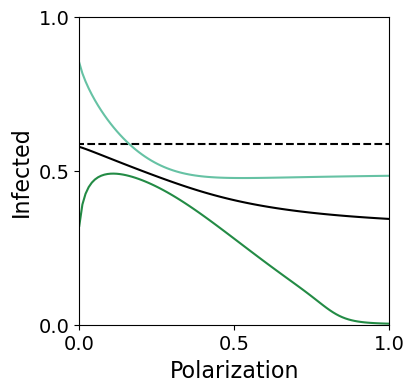

In [160]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([0,1], [baseline_M, baseline_M], color='black', linestyle='--')
ax.plot(pol_values, R_M01, color = CH[2])
#ax.plot(homophily_values, R_M05, color = CP[1])
#ax.plot(homophily_values, R_M09, color = CP[2])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Polarization", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline_M, baseline_M], color='black', linestyle='--')
ax.plot(pol_values, R_M01, color = CH[2])
ax.plot(pol_values, R_M05, color = CH[1])
ax.plot(pol_values, R_M09, color = CH[3])


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Polarization", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

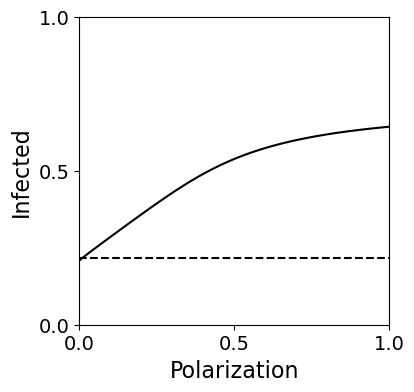

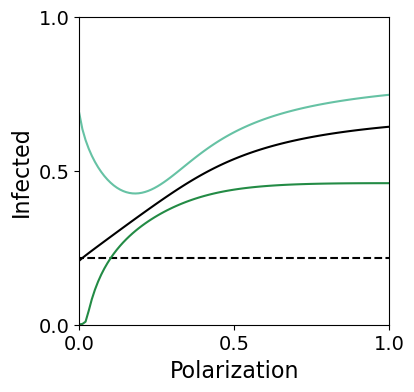

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([0,1], [baseline_T, baseline_T], color='black', linestyle='--')
ax.plot(pol_values, R_T01, color = CH[2])
#ax.plot(homophily_values, R_M05, color = CP[1])
#ax.plot(homophily_values, R_M09, color = CP[2])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Polarization", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline_T, baseline_T], color='black', linestyle='--')
ax.plot(pol_values, R_T01, color = CH[2])
ax.plot(pol_values, R_T05, color = CH[1])
ax.plot(pol_values, R_T09, color = CH[3])


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Polarization", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

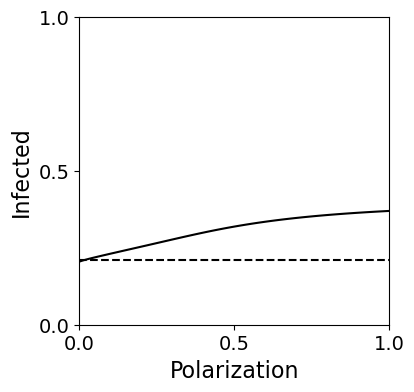

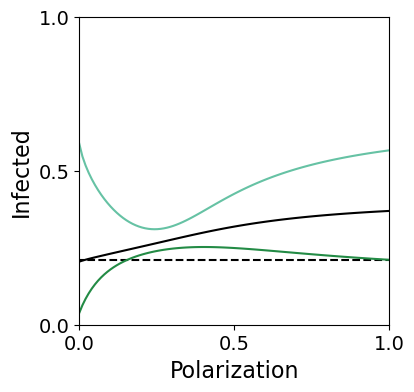

In [167]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([0,1], [baseline_V, baseline_V], color='black', linestyle='--')
ax.plot(pol_values, R_V01, color = CH[2])
#ax.plot(homophily_values, R_M05, color = CP[1])
#ax.plot(homophily_values, R_M09, color = CP[2])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Polarization", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)


fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline_V, baseline_V], color='black', linestyle='--')
ax.plot(pol_values, R_V01, color = CH[2])
ax.plot(pol_values, R_V05, color = CH[1])
ax.plot(pol_values, R_V09, color = CH[3])


ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("Polarization", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

In [132]:
P = 0.1
I01 = find_closest_pol_index(results_MASKS, P)
P = 0.5
I05 = find_closest_pol_index(results_MASKS, P)
P = 0.9
I09 = find_closest_pol_index(results_MASKS, P)




R_M01 = np.sum(results_MASKS['final_state']['R'][:,I01], axis=1)
R_M05 = np.sum(results_MASKS['final_state']['R'][:,I05], axis=1)
R_M09 = np.sum(results_MASKS['final_state']['R'][:,I09], axis=1)


P = 0.1
I01 = find_closest_pol_index(results_TESTS, P)
P = 0.5
I05 = find_closest_pol_index(results_TESTS, P)
P = 0.9
I09 = find_closest_pol_index(results_TESTS, P)



R_T01 = np.sum(results_TESTS['final_state']['R'][I01,:], axis=1)
R_T05 = np.sum(results_TESTS['final_state']['R'][I05,:], axis=1)
R_T09 = np.sum(results_TESTS['final_state']['R'][I09,:], axis=1)


P = 0.1
I01 = find_closest_pol_index(results_VACCINATION, P)
P = 0.5
I05 = find_closest_pol_index(results_VACCINATION, P)
P = 0.9
I09 = find_closest_pol_index(results_VACCINATION, P)

R_V01 = np.sum(results_VACCINATION['final_state']['R'][I01,:], axis=1)
R_V05 = np.sum(results_VACCINATION['final_state']['R'][I05,:], axis=1)
R_V09 = np.sum(results_VACCINATION['final_state']['R'][I09,:], axis=1)



In [48]:
homophily_values = np.linspace(-5, 5, 100)

In [124]:
baseline  = sweep_two_parameters(
        model_module=SIRM,
        param1_name='beta_params',
        param1_range=[0.00001],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[0],
        custom_base_params=custom_base_params
    )

baseline = np.sum(baseline['final_state']['R'], axis=2).flatten()[0]

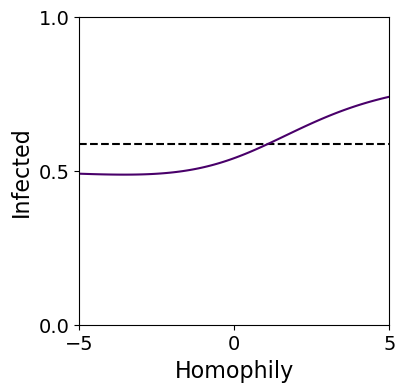

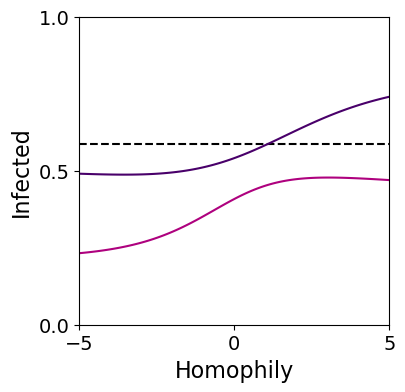

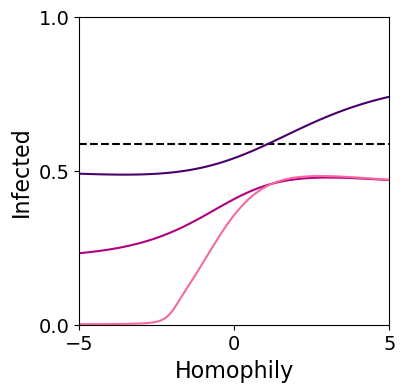

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_M01, color = CP[0])
#ax.plot(homophily_values, R_M05, color = CP[1])
#ax.plot(homophily_values, R_M09, color = CP[2])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_M01, color = CP[0])
ax.plot(homophily_values, R_M05, color = CP[1])
#ax.plot(homophily_values, R_M09, color = CP[2])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_M01, color = CP[0])
ax.plot(homophily_values, R_M05, color = CP[1])
ax.plot(homophily_values, R_M09, color = CP[2])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

In [126]:
baseline  = sweep_two_parameters(
        model_module=SIRT,
        param1_name='beta_params',
        param1_range=[0.00001],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[0],
        custom_base_params=custom_base_params
    )

baseline = np.sum(baseline['final_state']['R'], axis=2).flatten()[0]

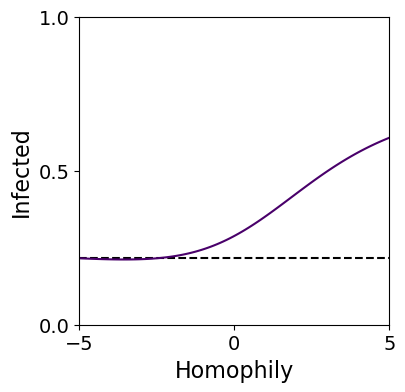

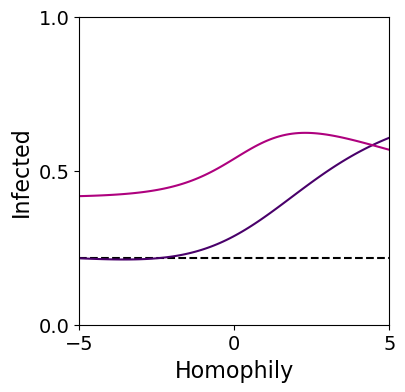

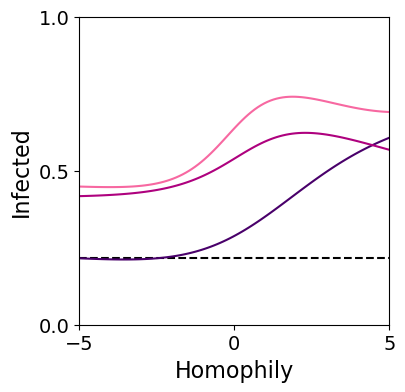

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_T01, color = CP[0])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_T01, color = CP[0])
ax.plot(homophily_values, R_T05, color = CP[1])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_T01, color = CP[0])
ax.plot(homophily_values, R_T05, color = CP[1])
ax.plot(homophily_values, R_T09, color = CP[2])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

In [130]:
baseline  = sweep_two_parameters(
        model_module=SIRV,
        param1_name='beta_params',
        param1_range=[0.00001],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[0],
        custom_base_params=custom_base_params
    )

baseline = np.sum(baseline['final_state']['R'], axis=2).flatten()[0]

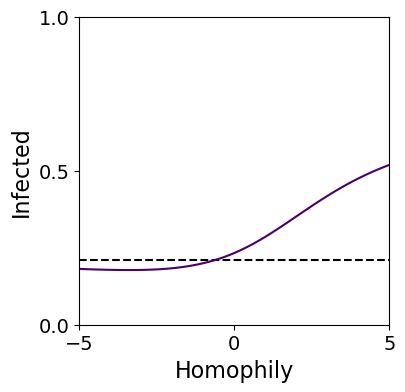

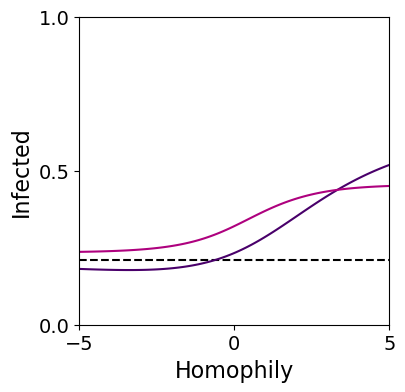

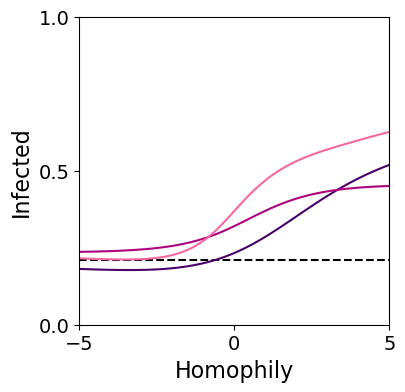

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_V01, color = CP[0])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_V01, color = CP[0])
ax.plot(homophily_values, R_V05, color = CP[1])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot([-5,5], [baseline, baseline], color='black', linestyle='--')
ax.plot(homophily_values, R_V01, color = CP[0])
ax.plot(homophily_values, R_V05, color = CP[1])
ax.plot(homophily_values, R_V09, color = CP[2])

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1)
ax.set_xlabel("Homophily", fontsize=16)
ax.set_ylabel("Infected", fontsize=16)

ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 0.5, 1])

# fontsize of ticks
ax.tick_params(axis='both', which='major', labelsize=14)

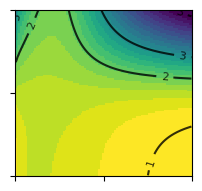

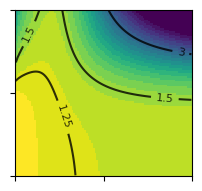

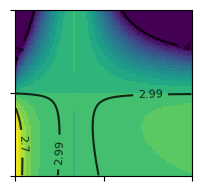

In [8]:
metrics = ["r0"]
cmaps = [discretize_cmaps("viridis_r",21)]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0,  0.5,  1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5],
        'vmin': 2.001,  # Set minimum value of colorbar
        'vmax': 7   # Set maximum value of colorbar
    }

final_params["vmin"] = 1
final_params["vmax"] = 5
fig_R0_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=[[1, 2, 3, 5]],
    contour_colors=[['#000','#000','#000']],
    final_params=final_params,
    save_path="./figures/Fig_2/R0(pol,hom)_M.pdf"
)

final_params["vmin"] = 1
final_params["vmax"] = 4
fig_4 = plot_multiple_metrics(
    results_TESTS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=[[1.25, 1.5, 3, 6]],
    contour_colors=[['#000','#000','#000','#999']],
    final_params=final_params,
    save_path="./figures/Fig_2/R0(pol,hom)_T.pdf"
)

final_params["vmin"] = 2.5
final_params["vmax"] = 4
fig_4 = plot_multiple_metrics(
    results_VACCINATION, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=[[2.7, 3-0.01, 4]],
    contour_colors=[['#000','#000','#000','#999']],
    final_params=final_params,
    save_path="./figures/Fig_2/R0(pol,hom)_V.pdf"
)

In [26]:
CH

['#00441b', '#238b45', '#000', '#66c2a4', '#99d8c9']

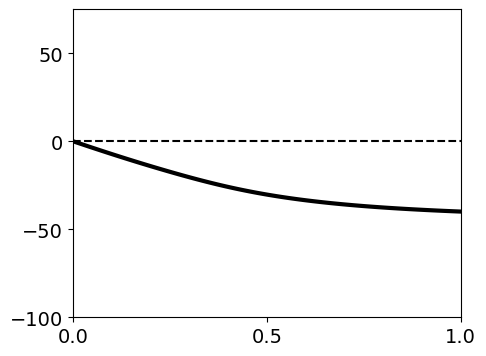

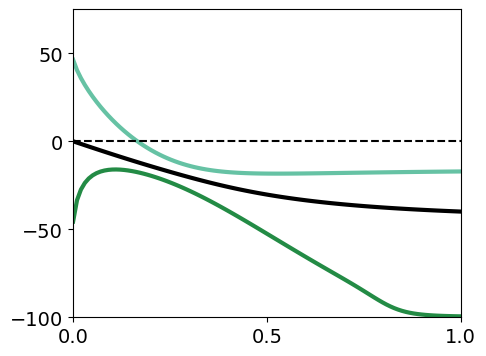

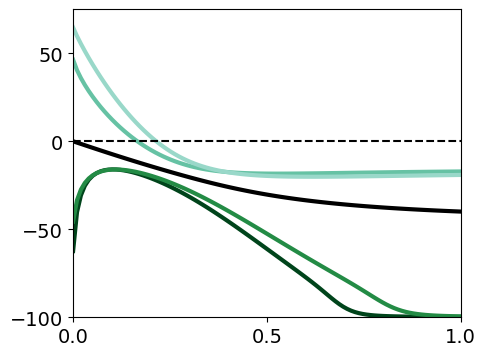

In [ ]:
model = SIRM


homs = [0]
Infected = np.zeros((len(homs),100))
polarization_values = np.linspace(0, 1, 100)

for i in range(len(homs)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[homs[i]],
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

CH0 = ['#000']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(len(homs)):
    ax.plot(polarization_values, (Infected[i,:]-Infected[0,0])/Infected[0,0]*100, label=f"hom={homs[i]}", color=CH0[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([-100, -50, 0, 50])
ax.set_xlim([0, 1])
ax.set_ylim([-100, 75])
# change fontsize of ticks
ax.tick_params(labelsize=14)

homs = [-2.5, 0, 2.5]
Infected = np.zeros((len(homs),100))
polarization_values = np.linspace(0, 1, 100)

for i in range(len(homs)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[homs[i]],
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

CH3 = [ '#238b45', '#000', '#66c2a4']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(len(homs)):
    PIN =  (Infected[i,:]-Infected[1,0])/Infected[1,0]
    ax.plot(polarization_values,PIN*100, label=f"hom={homs[i]}", color=CH3[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([-100, -50, 0, 50])
ax.set_xlim([0, 1])
ax.set_ylim([-100, 75])
# change fontsize of ticks
ax.tick_params(labelsize=14)

homs = [-5, -2.5, 0, 2.5, 5]
Infected = np.zeros((len(homs),100))
polarization_values = np.linspace(0, 1, 100)

for i in range(len(homs)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[homs[i]],
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

CH3 = [ '#238b45', '#000', '#66c2a4']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(len(homs)):
    PIN =  (Infected[i,:]-Infected[2,0])/Infected[2,0]
    ax.plot(polarization_values,PIN*100, label=f"hom={homs[i]}", color=CH[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')

ax.set_xticks([0, 0.5, 1])
ax.set_yticks([-100, -50, 0, 50])
ax.set_xlim([0, 1])
ax.set_ylim([-100, 75])
# change fontsize of ticks
ax.tick_params(labelsize=14)

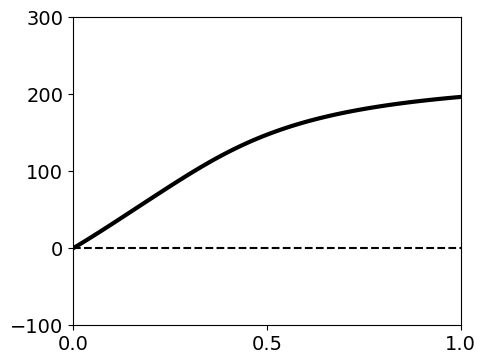

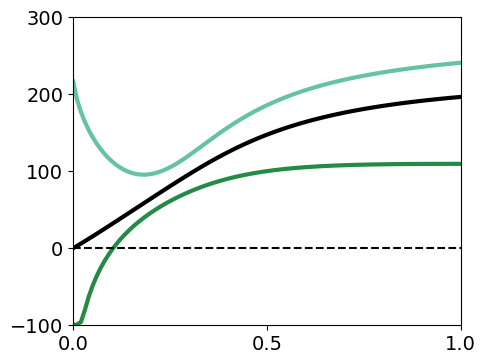

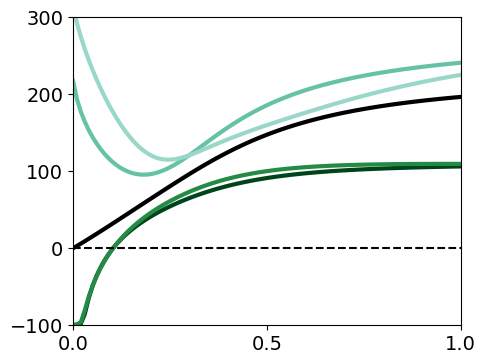

In [114]:
model = SIRT
CH0 = ['#000']
CH3 = [ '#238b45', '#000', '#66c2a4']

homs = [0]
Infected = np.zeros((len(homs),100))
polarization_values = np.linspace(0, 1, 100)
xtics = [0, 0.5, 1]
ytics = [-100, 0, 100, 200, 300]
xlim = [0, 1]
ylim = [-100, 300]


for i in range(len(homs)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[homs[i]],
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()



fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(len(homs)):
    ax.plot(polarization_values, (Infected[i,:]-Infected[0,0])/Infected[0,0]*100, label=f"hom={homs[i]}", color=CH0[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')

ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# change fontsize of ticks
ax.tick_params(labelsize=14)

homs = [-2.5, 0, 2.5]
Infected = np.zeros((len(homs),100))
polarization_values = np.linspace(0, 1, 100)

for i in range(len(homs)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[homs[i]],
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()


fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(len(homs)):
    PIN =  (Infected[i,:]-Infected[1,0])/Infected[1,0]
    ax.plot(polarization_values,PIN*100, label=f"hom={homs[i]}", color=CH3[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')

ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# change fontsize of ticks
ax.tick_params(labelsize=14)





homs = [-5, -2.5, 0, 2.5, 5]
Infected = np.zeros((len(homs),100))
polarization_values = np.linspace(0, 1, 100)

for i in range(len(homs)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[homs[i]],
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

CH3 = [ '#238b45', '#000', '#66c2a4']

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

for i in range(len(homs)):
    PIN =  (Infected[i,:]-Infected[2,0])/Infected[2,0]
    ax.plot(polarization_values,PIN*100, label=f"hom={homs[i]}", color=CH[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# change fontsize of ticks
ax.tick_params(labelsize=14)

In [117]:
CP = ['#000','#49006a','#7a0177','#ae017e','#f768a1']
CP2 = ['#000','#49006a']
CP3 = ['#000','#49006a','#7a0177']
CP5 = ['#000','#49006a','#7a0177','#ae017e','#f768a1']



model = SIRM






In [141]:
baseline  = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=[0.00001],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range=[0],
        custom_base_params=custom_base_params
    )

baseline = np.sum(baseline['final_state']['R'], axis=2).flatten()[0]


print(baseline)

0.7173534


In [ ]:
CH = model = SIRM

pols = [0.1]
Infected = np.zeros((len(pols),100))
homophily_values = np.linspace(-5, 5, 100)
xtics = [-5, 0, 5]
ytics = [-100, -50, 0, 50]
xlim = [-5, 5]
ylim = [-100, 50]


for i in range(len(pols)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=pols,  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range={"m": -5, "M": 5, "n": 100},
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(len(pols)):
    PIN =  (Infected[i,:]-baseline)/baseline
    ax.plot(homophily_values,PIN * 100, color=CP[i], linewidth=3)
ax.plot([-5, 5], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=14)

pols = [0.1, 0.5]
Infected = np.zeros((len(pols),100))

for i in range(len(pols)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=[pols[i]],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range={"m": -5, "M": 5, "n": 100},
        custom_base_params=custom_base_params
    )
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(len(pols)):
    PIN =  (Infected[i,:]-baseline)/baseline
    ax.plot(homophily_values,PIN * 100, color=CP[i], linewidth=3)
ax.plot([-5, 5], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=14)

pols = [0.1, 0.5, 0.9]
Infected = np.zeros((len(pols),100))

for i in range(len(pols)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=[pols[i]],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range={"m": -5, "M": 5, "n": 100},
        custom_base_params=custom_base_params
    )
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(len(pols)):
    PIN =  (Infected[i,:]-baseline)/baseline
    ax.plot(homophily_values,PIN * 100, color=CP[i], linewidth=3)
ax.plot([-5, 5], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=14)

['#00441b', '#238b45', '#000', '#66c2a4', '#99d8c9']

In [154]:
CH =['#49006a', '#ae017e', '#f768a1']

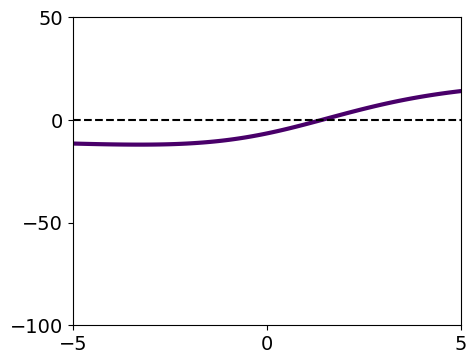

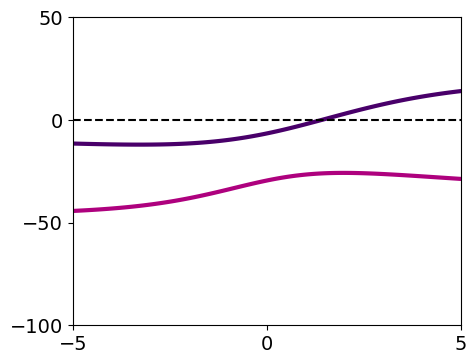

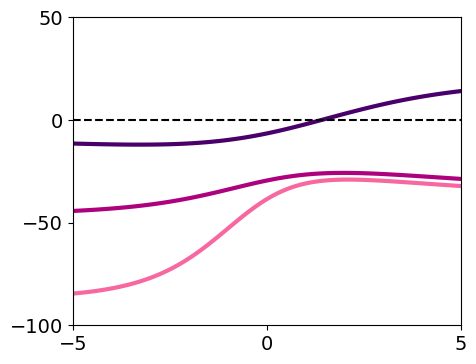

In [158]:
model = SIRM

pols = [0.1]
Infected = np.zeros((len(pols),100))
homophily_values = np.linspace(-5, 5, 100)
xtics = [-5, 0, 5]
ytics = [-100, -50, 0, 50]
xlim = [-5, 5]
ylim = [-100, 50]


for i in range(len(pols)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=pols,  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range={"m": -5, "M": 5, "n": 100},
        custom_base_params=custom_base_params
    )
    
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(len(pols)):
    PIN =  (Infected[i,:]-baseline)/baseline
    ax.plot(homophily_values,PIN * 100, color=CH[i], linewidth=3)
ax.plot([-5, 5], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=14)

pols = [0.1, 0.5]
Infected = np.zeros((len(pols),100))

for i in range(len(pols)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=[pols[i]],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range={"m": -5, "M": 5, "n": 100},
        custom_base_params=custom_base_params
    )
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(len(pols)):
    PIN =  (Infected[i,:]-baseline)/baseline
    ax.plot(homophily_values,PIN * 100, color=CH[i], linewidth=3)
ax.plot([-5, 5], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=14)

pols = [0.1, 0.5, 0.9]
Infected = np.zeros((len(pols),100))

for i in range(len(pols)):
    results_full = sweep_two_parameters(
        model_module=model,
        param1_name='beta_params',
        param1_range=[pols[i]],  # Varying polarization from low to high
        param2_name='homophilic_tendency',
        param2_range={"m": -5, "M": 5, "n": 100},
        custom_base_params=custom_base_params
    )
    Infected[i,:] = np.sum(results_full['final_state']['R'], axis=2).flatten()

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
for i in range(len(pols)):
    PIN =  (Infected[i,:]-baseline)/baseline
    ax.plot(homophily_values,PIN * 100, color=CH[i], linewidth=3)
ax.plot([-5, 5], [0, 0], color='black', linestyle='--')
ax.set_xticks(xtics)
ax.set_yticks(ytics)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.tick_params(labelsize=14)

In [160]:
Infected[2,:]

array([0.11086736, 0.11213221, 0.11350261, 0.11498599, 0.11658952,
       0.11832148, 0.12019021, 0.12220463, 0.12437475, 0.12670933,
       0.12922026, 0.13191818, 0.13481498, 0.13792363, 0.14125712,
       0.14482951, 0.14865559, 0.152751  , 0.15713143, 0.16181332,
       0.16681275, 0.17214711, 0.17783079, 0.18387988, 0.19030786,
       0.19712743, 0.20434804, 0.21197683, 0.22001812, 0.22847199,
       0.23733361, 0.24659406, 0.25623855, 0.26624641, 0.27658924,
       0.28723407, 0.29813904, 0.30925661, 0.32053283, 0.33190817,
       0.34331769, 0.35469389, 0.36596754, 0.37706786, 0.387927  ,
       0.39848   , 0.40866661, 0.41843271, 0.42773181, 0.43652612,
       0.44478625, 0.45249116, 0.45962918, 0.46619669, 0.47219682,
       0.47763982, 0.48254186, 0.48692292, 0.49080688, 0.49422061,
       0.49719268, 0.49975264, 0.50193036, 0.50375599, 0.50525886,
       0.50646728, 0.50740838, 0.50810796, 0.50859064, 0.50887835,
       0.50899285, 0.50895303, 0.50877684, 0.50848043, 0.50807

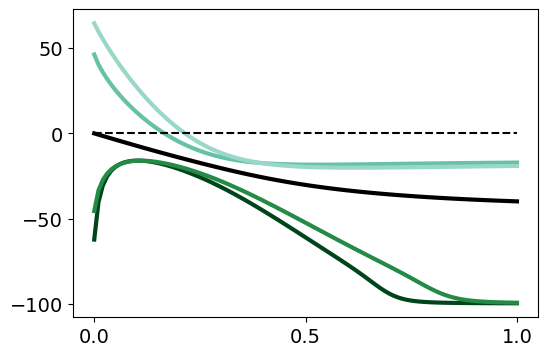

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

for i in range(5):
    ax.plot(polarization_values, (Infected[i,:]-Infected[2,0])/Infected[2,0]*100, label=f"hom={homs[i]}", color=CH[i], linewidth=3)

ax.plot([0, 1], [0, 0], color='black', linestyle='--')

ax.set_xticks([0, 0.5, 1])
# change fontsize of ticks
ax.tick_params(labelsize=14)



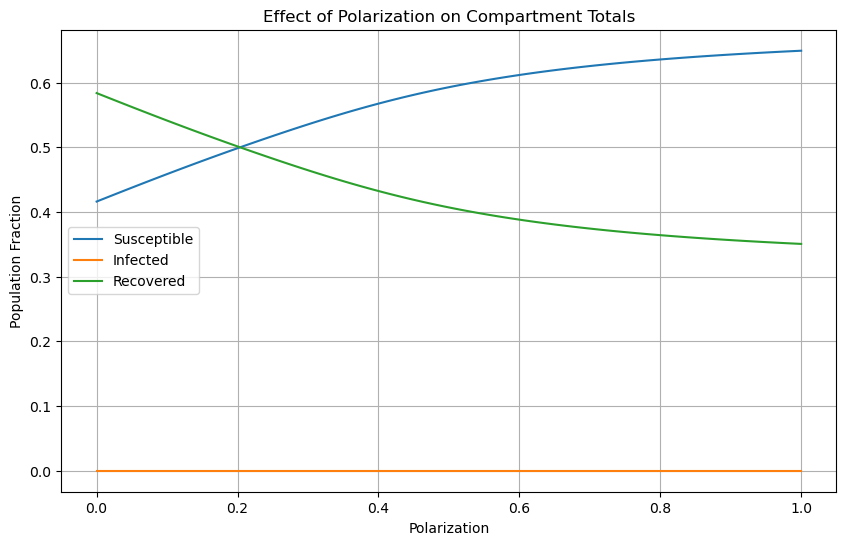

In [80]:
results_full = sweep_two_parameters(
    model_module=SIRM,
    param1_name='beta_params',
    param1_range={"m": 0, "M": 1.0, "n": 100},  # Varying polarization from low to high
    param2_name='homophilic_tendency',
    param2_range=[0],
    custom_base_params=custom_base_params
)

polarization_values = np.linspace(0, 1, 100)

# Sum along axis 2 (population compartments) for each polarization value
S_totals = np.sum(results_full['final_state']['S'], axis=2).flatten()
I_totals = np.sum(results_full['final_state']['I'], axis=2).flatten()
R_totals = np.sum(results_full['final_state']['R'], axis=2).flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(polarization_values, S_totals, label='Susceptible')
plt.plot(polarization_values, I_totals, label='Infected')
plt.plot(polarization_values, R_totals, label='Recovered')
plt.xlabel('Polarization')
plt.ylabel('Population Fraction')
plt.legend()
plt.grid(True)
plt.title('Effect of Polarization on Compartment Totals')
plt.show()

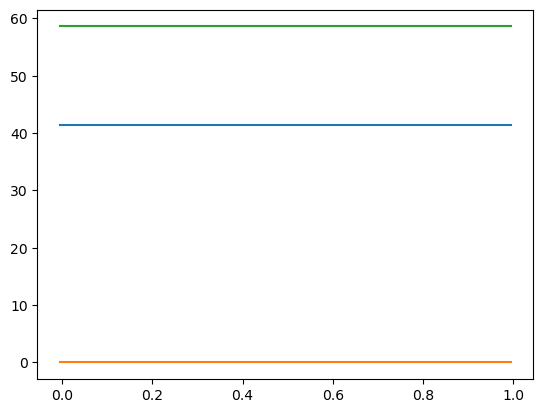

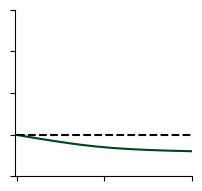

In [38]:
homophily_values = [0]
xlim = (-0.01, 1)
fig_M, results_M, baseline_M = run_pol_hom_effect_analysis(
    model_module=SIRM,
    discrete_param_name="homophilic_tendency",
    discrete_param_values=homophily_values,
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[0, 0.5, 1.0],
    yticks=[-100, 0, 100, 200, 300],
    xticklabels=[],  # Hide x tick labels
    yticklabels=[],  # Hide y tick labels
    custom_ylim=(-100, 300),
    custom_xlim=xlim,
    show_legend=False,
    colors=CH,
    save_path="./figures/Fig_2/PVB(pol)_M.pdf"
)

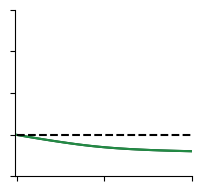

In [35]:
homophily_values = [0, 0]
xlim = (-0.01, 1)
fig_M, results_M, baseline_M = run_pol_hom_effect_analysis(
    model_module=SIRM,
    discrete_param_name="homophilic_tendency",
    discrete_param_values=homophily_values,
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[0, 0.5, 1.0],
    yticks=[-100, 0, 100, 200, 300],
    xticklabels=[],  # Hide x tick labels
    yticklabels=[],  # Hide y tick labels
    custom_ylim=(-100, 300),
    custom_xlim=xlim,
    show_legend=False,
    colors=CH,
    save_path="./figures/Fig_2/PVB(pol)_M.pdf"
)

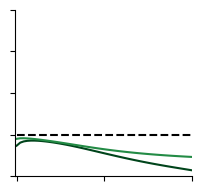

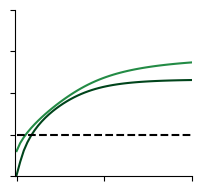

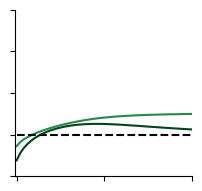

In [ ]:


fig_T, results_T, baseline_T = run_pol_hom_effect_analysis(
    model_module=SIRT,
    discrete_param_name="homophilic_tendency",
    discrete_param_values=homophily_values,
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[0, 0.5, 1.0],
    yticks=[-100, 0, 100, 200, 300],
    xticklabels=[],  # Hide x tick labels
    yticklabels=[],  # Hide y tick labels
    custom_ylim=(-100, 300),
    custom_xlim=xlim,
    show_legend=False,
    colors=CH,
    save_path="figures/Fig_2/PVB(pol)_T.pdf"
)

fig, results, baseline = run_pol_hom_effect_analysis(
    model_module=SIRV,
    discrete_param_name="homophilic_tendency",
    discrete_param_values=homophily_values,
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[0, 0.5, 1.0],
    yticks=[-100, 0, 100, 200, 300],
    xticklabels=[],  # Hide x tick labels
    yticklabels=[],  # Hide y tick labels
    custom_ylim=(-100, 300),
    custom_xlim=xlim,
    show_legend=False,
    colors=CH,
    save_path="figures/Fig_2/PVB(pol)_V.pdf"
)

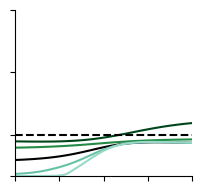

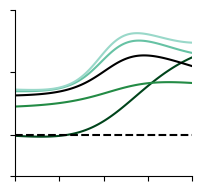

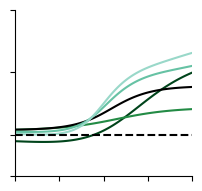

In [10]:
polarization_values = [0.0005, 0.3, 0.5, 0.7, 0.9995]
hom_range = {"m": -5, "M": 5, "n": 100}
disc_name = "beta_params"
cont_name = "homophilic_tendency"

fig, results, baseline = run_pol_hom_effect_analysis(
    model_module=SIRM,
    discrete_param_name=disc_name,          # Now using polarization as the discrete parameter
    discrete_param_values=polarization_values,
    continuous_param_name=cont_name,        # Now using homophily as the continuous parameter
    continuous_param_range=hom_range,
    compartment_to_analyze="R",
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[-5, -2.5, 0, 2.5, 5],
    yticks=[-100,0, 150, 300],
    xticklabels=[],
    yticklabels=[],
    custom_ylim=(-100, 300),
    custom_xlim=(-5, 5),
    show_legend=False,
    colors=CH,
    save_path="./figures/Fig_2/PVB(hom)_M.pdf"
)

fig, results, baseline = run_pol_hom_effect_analysis(
    model_module=SIRT,
    discrete_param_name=disc_name,          # Now using polarization as the discrete parameter
    discrete_param_values=polarization_values,
    continuous_param_name=cont_name,        # Now using homophily as the continuous parameter
    continuous_param_range=hom_range,
    compartment_to_analyze="R",
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[-5, -2.5, 0, 2.5, 5],
    yticks=[-100,0, 150, 300],
    xticklabels=[],
    yticklabels=[],
    custom_ylim=(-100, 300),
    custom_xlim=(-5, 5),
    show_legend=False,
    colors=CH,
    save_path="./figures/Fig_2/PVB(hom)_T.pdf"
)

fig, results, baseline = run_pol_hom_effect_analysis(
    model_module=SIRV,
    discrete_param_name=disc_name,          # Now using polarization as the discrete parameter
    discrete_param_values=polarization_values,
    continuous_param_name=cont_name,        # Now using homophily as the continuous parameter
    continuous_param_range=hom_range,
    compartment_to_analyze="R",
    custom_base_params=custom_base_params,
    publication_ready=True,
    xticks=[-5, -2.5, 0, 2.5, 5],
    yticks=[-100,0, 150, 300],
    xticklabels=[],
    yticklabels=[],
    custom_ylim=(-100, 300),
    custom_xlim=(-5, 5),
    show_legend=False,
    colors=CH,
    save_path="./figures/Fig_2/PVB(hom)_V.pdf"
)

In [164]:
def find_closest_pol_index(results, target_pol_value):
    """
    Find the index where polarization is closest to target_pol_value
    
    Args:
        results: Dictionary returned by sweep_two_parameters
        target_pol_value: The polarization value you're looking for
        
    Returns:
        Index in the flattened array where polarization is closest to target
    """
    # Get polarization values from the parameter grid
    param1_name = results['parameter_names']['param1']
    
    if param1_name == "beta_params":
        # Polarization values are in param1 (first dimension)
        pol_values = np.linspace(
            results['parameter_ranges']['param1']['m'],
            results['parameter_ranges']['param1']['M'],
            results['parameter_ranges']['param1']['n']
        )
        # Find closest index
        closest_idx = np.argmin(np.abs(pol_values - target_pol_value))
        return closest_idx
    else:
        # Polarization values are in param2 (second dimension)
        pol_values = np.linspace(
            results['parameter_ranges']['param2']['m'],
            results['parameter_ranges']['param2']['M'],
            results['parameter_ranges']['param2']['n']
        )
        # Find closest index
        closest_idx = np.argmin(np.abs(pol_values - target_pol_value))
        return closest_idx

In [165]:
target_pol = 0.9
pol_idx = find_closest_pol_index(results_MASKS, target_pol)

In [166]:
pol_idx

89

In [174]:
def plot_polarization_homophily_effect(
    model, 
    pols, 
    baseline,
    custom_base_params=None,
    homophily_range={"m": -5, "M": 5, "n": 100},
    compartment='R',
    xtics=[-5, 0, 5],
    ytics=[-100, -50, 0, 50],
    xlim=[-5, 5],
    ylim=[-100, 50],
    figsize=(5, 4),
    linewidth=3,
    colors=None,
    tick_fontsize=14,
    simulated_days=1000,
    population_size=100,
    batch_size=1000,
    plot_percentages=True
):
    """
    Plot the effect of homophily on infection rates for different polarization levels.
    
    Parameters:
    -----------
    model : module
        The epidemic model module (e.g., SIRM)
    pols : list
        List of polarization values to plot
    baseline : float
        Baseline value for calculating percentage change
    custom_base_params : dict, optional
        Custom parameters for the model
    homophily_range : dict, optional
        Range for homophily parameter with keys 'm', 'M', and 'n'
    compartment : str, optional
        Compartment to analyze (default: 'R')
    xtics, ytics : list, optional
        Tick positions for x and y axes
    xlim, ylim : list, optional
        Limits for x and y axes
    figsize : tuple, optional
        Figure size (width, height)
    linewidth : int, optional
        Line width for plots
    colors : list, optional
        Colors for different polarization values
    tick_fontsize : int, optional
        Font size for tick labels
        
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated figure
    ax : matplotlib.axes.Axes
        The axes object
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from src.utils.batch_sweep import sweep_two_parameters
    
    # Use default colors if none provided
    if colors is None:
        colors = ["#000", "#7f0000", "#d7301f", "#fc8d59", "#fdbb84"]
    
    # Initialize array to store infected counts
    Infected = np.zeros((len(pols), homophily_range["n"]))
    
    # Calculate homophily values
    homophily_values = np.linspace(homophily_range["m"], homophily_range["M"], homophily_range["n"])
    
    # Run simulations for each polarization value
    for i in range(len(pols)):
        results_full = sweep_two_parameters(
            model_module=model,
            param1_name='beta_params',
            param1_range=[pols[i]],  # Single polarization value
            param2_name='homophilic_tendency',
            param2_range=homophily_range,
            custom_base_params=custom_base_params,
            simulated_days=simulated_days,
            population_size=population_size,
            batch_size=batch_size
        )
        
        # Store sum of compartment values across population groups
        Infected[i, :] = np.sum(results_full['final_state'][compartment], axis=2).flatten()
    
    # Create figure and plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Plot values for each polarization value
    for i in range(len(pols)):
        if plot_percentages:
            # Calculate percentage change from baseline
            PIN = (Infected[i, :] - baseline) / baseline
            ax.plot(homophily_values, PIN * 100, color=colors[i % len(colors)], linewidth=linewidth, 
                    label=f"Polarization = {pols[i]}" if len(pols) > 1 else None)
        else:
            # Plot raw values
            ax.plot(homophily_values, Infected[i, :], color=colors[i % len(colors)], linewidth=linewidth, 
                    label=f"Polarization = {pols[i]}" if len(pols) > 1 else None)
    
    # Add zero line
    ax.plot([homophily_range["m"], homophily_range["M"]], [0, 0], color='black', linestyle='--')
    
    # Set axis properties
    ax.set_xticks(xtics)
    ax.set_yticks(ytics)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.tick_params(labelsize=tick_fontsize)
    
    # Add legend if multiple polarization values
    if len(pols) > 1:
        ax.legend()
    
    # Label axes
    ax.set_xlabel("Homophily")
    if plot_percentages:
        ax.set_ylabel("% Change")
    else:
        ax.set_ylabel(f"Final {compartment} Value")
    
    return fig, ax

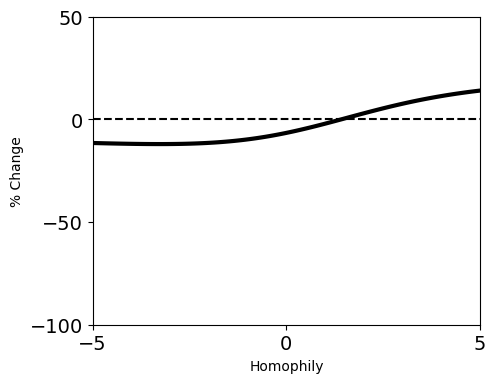

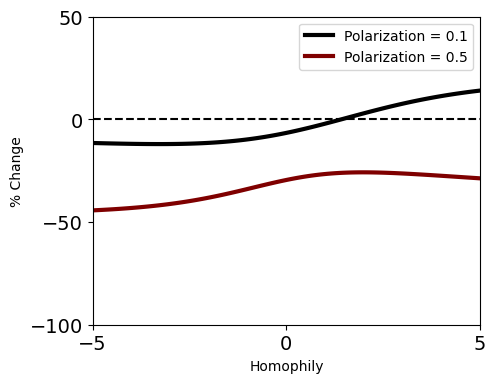

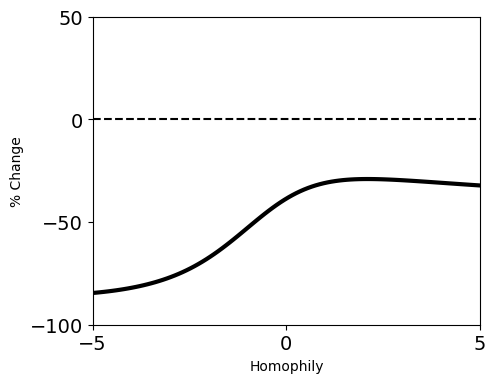

In [ ]:
# First plot with polarization = 0.1
fig1, ax1 = plot_polarization_homophily_effect(
    model=SIRM, 
    pols=[0.1], 
    baseline=baseline,
    custom_base_params=custom_base_params
)

# Second plot with polarization = 0.1 and 0.5
fig2, ax2 = plot_polarization_homophily_effect(
    model=SIRM, 
    pols=[0.1, 0.5], 
    baseline=baseline,
    custom_base_params=custom_base_params
)

# Third plot with polarization = 0.1, 0.5, and 0.9
fig3, ax3 = plot_polarization_homophily_effect(
    model=SIRM, 
    pols=[0.9], 
    baseline=baseline,
    custom_base_params=custom_base_params
)

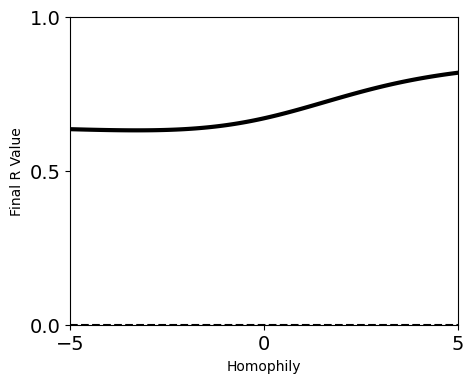

In [179]:
Copyfig, ax = plot_polarization_homophily_effect(
    model=SIRM, 
    pols=[0.1], 
    baseline=baseline,
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=100,
    batch_size=1000,
    plot_percentages=False,  # Set to false to plot raw values
    
    xtics=[-5, 0, 5],
    ytics=[0, 0.5, 1],
    xlim=[-5, 5],
    ylim=[0,1]
)